**1. RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h59m28.3566s, Dec +40° 44′ 02.096″)**

### Ans:

Yes, RA and Dec will change. But the change is very minor. It happens because Earth's rotational axis wobbles slowly which shifts the celestial coordinate system.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, get_sun, GCRS, AltAz, Angle
from astropy.time import Time
import numpy as np


RA_i = 19*u.hour + 59*u.minute + 28.3566*u.second
Dec_i = 40*u.degree + 44*u.arcminute + 2.096*u.arcsecond

In [ ]:
coord_J2000 = SkyCoord(ra=RA_i, dec=Dec_i, frame='gcrs', obstime='J2000') #Cygnus-A in J2000
coord_J2026 = coord_J2000.transform_to(GCRS(obstime='J2026.0')) #Cygnus-A in J2026

print(f'Coordinates J2000.0: RA: {coord_J2000.ra.to_string(unit=u.hour, sep=':', pad=True)} hr, Dec: {coord_J2000.dec.to_string(unit=u.deg, sep=':', pad=True)} deg')
print(f'Coordinates J2026.0: RA: {coord_J2026.ra.to_string(unit=u.hour, sep=':', pad=True)} hr, Dec: {coord_J2026.dec.to_string(unit=u.deg, sep=':', pad=True)} deg')

**2. What will be this source's azimuth and elevation when observing from IIT Kanpur ?**

### Ans:


In [ ]:
cyg_loc = SkyCoord(ra=RA_i, dec=Dec_i, frame='gcrs') 
iitk_loc = EarthLocation(lat='26.51242d', lon='80.22498d', height=130 * u.m) # Exact coord of IITK

ot = Time('2026-01-21', scale='utc') # UTC time

# Convert to AltAz
altaz_frame = AltAz(location=iitk_loc, obstime=ot)
cyg_altaz = cyg_loc.transform_to(altaz_frame)

print(f"RA/Dec: {cyg_loc.to_string('hmsdms')}")
print(f"Altitude: {cyg_altaz.alt:.4f}")
print(f"Azimuth: {cyg_altaz.az:.4f}")

**3. Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.**


#### Ans:


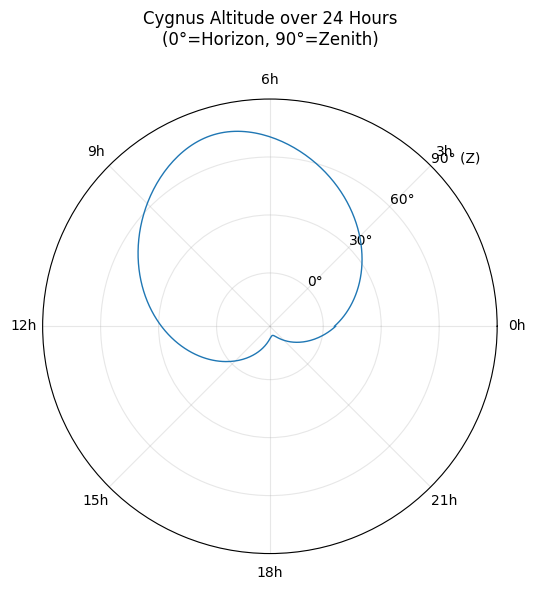

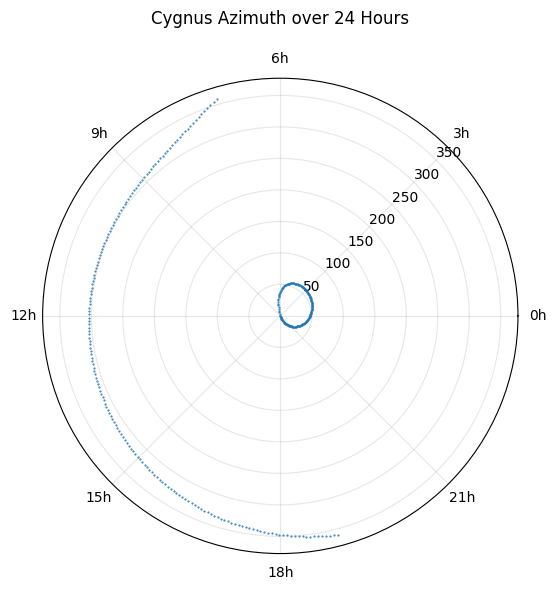

In [ ]:
obs_loc = EarthLocation(lat='26.51242d', lon='80.22498d', height=130 * u.m) 

tg_loc = SkyCoord(ra=RA_i, dec=Dec_i, frame='gcrs') 

start_time = Time("2026-01-21", scale='utc') 

# Array of times over the next 24 hours
tstep = np.linspace(0, 24, 360)
delta_time = tstep * u.hour
observe_times = start_time + delta_time

frame_altaz = AltAz(obstime=observe_times, location=obs_loc)

target_altaz = tg_loc.transform_to(frame_altaz)

angles = Angle(delta_time)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

theta = np.linspace(0, 2*np.pi, len(delta_time))

# Altitude variation
ax.plot(theta, target_altaz.alt.deg, label='Altitude', linewidth=1)

# Ticks and labels
ax.set_yticks([0, 30, 60, 90])
ax.set_yticklabels(['0°', '30°', '60°', '90° (Z)'])
ax.set_rlabel_position(45)  

hours_ticks = np.arange(0, 24, 3)
theta_ticks = hours_ticks * (2*np.pi / 24)
ax.set_xticks(theta_ticks)
ax.set_xticklabels([f"{h}h" for h in hours_ticks])

plt.title(f"Altitude of cygnus \n(0°=Horizon, 90°=Zenith)", pad=20)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))

theta = np.linspace(0, 2*np.pi, len(delta_time))

ax.plot(theta, target_altaz.az.deg, '.', markersize=1, label='Azimuth')

ax.set_rlabel_position(45) 

hours_ticks = np.arange(0, 24, 3)
theta_ticks = hours_ticks * (2*np.pi / 24)
ax.set_xticks(theta_ticks)
ax.set_xticklabels([f"{h}h" for h in hours_ticks])

plt.title(f"Azimuth of Cygnus", pad=20)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**4. Plot how Sun’s RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?**
 

#### Ans:


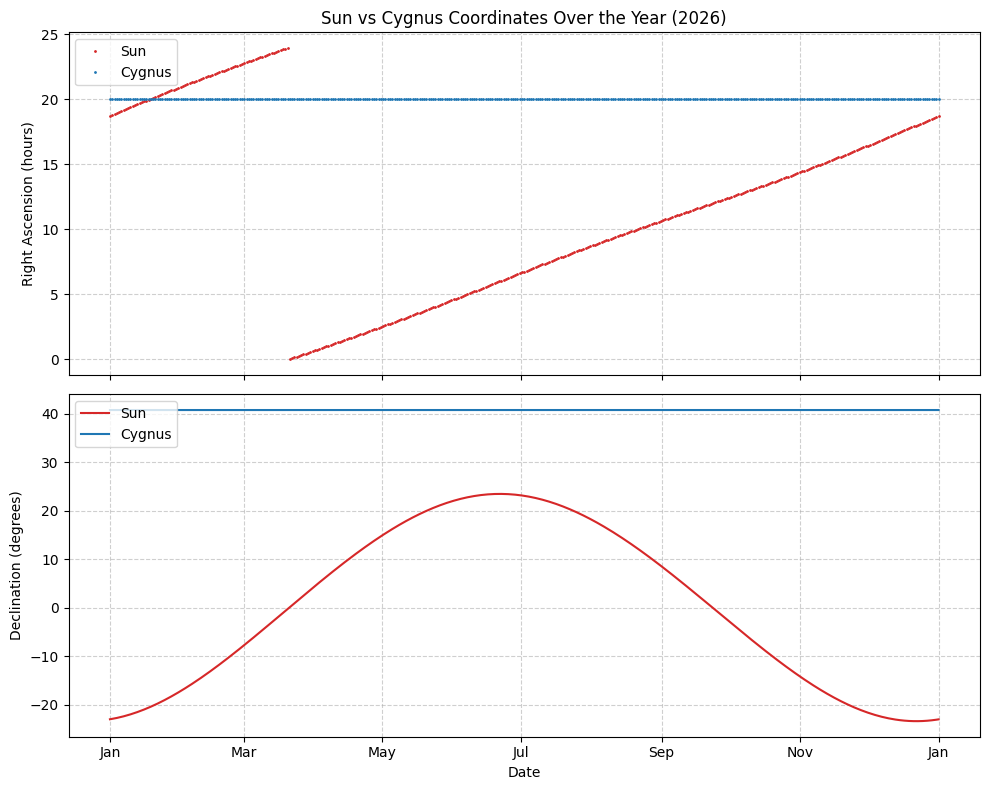

In [34]:
time_start = Time("2026-01-01", scale='utc') # Year 2026 starts

time_delta = np.linspace(0, 365, 365) * u.day 
time_array = time_start + time_delta 

cygnus_loc = SkyCoord(ra=RA_i, dec=Dec_i, frame='icrs')  

sun_coords = get_sun(time_array) # Sun's coordinates
cygnus_coords = cygnus_loc.transform_to(GCRS(obstime=time_array)) 

sunra = sun_coords.ra.hour 
sundec = sun_coords.dec.deg

cygra = cygnus_coords.ra.hour
cygdec = cygnus_coords.dec.deg

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.plot(time_array.datetime, sunra, '.', markersize=2, color='tab:green', label='Sun')
ax1.plot(time_array.datetime, cygra, '.', markersize=2, color='tab:blue', label='Cygnus')
ax1.set_ylabel('RA (hours)')
ax1.set_title('Cygnus vs Sun coordinates (2026)')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper left')

# Plot Declination
ax2.plot(time_array.datetime, sundec, '-', color='tab:green', label='Sun')
ax2.plot(time_array.datetime, cygdec, '-', color='tab:blue', label='Cygnus')
ax2.set_ylabel('Dec (degrees)')
ax2.set_xlabel('Date')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(loc='upper left')

ax2.xaxis.set_major_formatter(mdt.DateFormatter('%b'))

plt.tight_layout()
plt.show()

### Notes

- Perplexity for codes and concepts